# Содержание

1. [Изучение и предобработка данных](#info_id)
2. [Приоритизация гипотез](#priority)
3. [Анализ A/B теста](#A/B_analysis)
    1. [Расчет накопительных показателей](#cummulative_metrics)
    2. [Анализ на сырых данных:](#analysis_anomaly_data)
        1. [График изменения кумулятивной выручки по группам](#cummulative_revenue)
        2. [График изменения кумулятивного среднего чека по группам](#cummulative_revenue_mean)
        3. [График относительного изменения кумулятивного среднего чека](#proportion_cummulative_revenue_mean)
        4. [рафик изменения кумулятивной конверсии по группам](#cummulative_conversion)
        5. [График относительного изменения кумулятивной конверсии по группам](#proportion_cummulative_conversion)
    3. [Выявление аномалий в данных](#detection_anomaly_in_data)
    4. [Расчет статистической значимости различий в группах на сырых данных](#p_value_data)
    5. [Расчет статистической значимости различий в группах на очищенных данных](#p_value_filtered_data)
4. [Общий вывод](#fin)

<a id='info_id'></a>
## Изучение и предобработка данных
***
**to do:**
1. Импортируем необходимые библиотеки
2. Прочитаем данные
3. Проверим:
    - пропуски;
    - дубликаты;
    - не соответствие типов данных;
4. Выполним предобработку данных;    
5. Сделаем вывод.


In [ ]:
# Основные библиотеки
import pandas as pd
import numpy as np
import scipy.stats as stats
import datetime as dt

# Библиотеки визуализации
import matplotlib.pyplot as plt
import seaborn as sns

# Дополнительные библиотеки
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import os

In [ ]:
# Параметры и настройки
pd.set_option("max_colwidth", 500)

Напишем функцию для вывода первичной информации о данных. 

In [ ]:
# Функция для вывода необходимой информации для первичной проверки данных
# Включает в себя: Общую информацию о датасете, описательную статистику и количество дублей
def check_data (df):  
  print('\033[1m' + 'ОБЩАЯ ИНФОРМАЦИЯ ПО ДАТАСЕТУ' + '\033[0m'),\
  print('----------------------------------------'),\
  df.info(),\
  print(''),\
  print('\033[1m' + 'ОПИСАТЕЛЬНАЯ СТАТИСТИКА' + '\033[0m'),\
  print('----------------------------------------'),\
  print(df.describe()),\
  print('----------------------------------------'),\
  print(''),\
  print('\033[1m' + 'КОЛИЧЕСТВО ДУБЛИКАТОВ:' + '\033[0m', df.duplicated().sum())

**Проверка датасета с гипотезами**

In [ ]:
df_hypotheses.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [ ]:
check_data(df_hypotheses)

ОБЩАЯ ИНФОРМАЦИЯ ПО ДАТАСЕТУ
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes

ОПИСАТЕЛЬНАЯ СТАТИСТИКА
----------------------------------------
           Reach     Impact  Confidence    Efforts
count   9.000000   9.000000    9.000000   9.000000
mean    4.777778   4.777778    5.555556   4.888889
std     3.153481   3.192874    3.045944   2.803767
min     1.000000   1.000000    1.000000   1.000000
25%     3.000000   3.000000    3.000000   3.000000
50%     3.000000   3.000000    7.000000   5.000000
75%     8.000000   7.000000    8.000000   6.000000
max    10.000000  10.000000    9.000000  10.000000
----------------------------------------

КОЛИЧЕСТВО ДУБЛИКАТОВ: 0


Изучим какие гипотезы были подготовлены

In [ ]:
df_hypotheses['Hypothesis']

0              Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
1                                       Запустить собственную службу доставки, что сократит срок доставки заказов
2    Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3             Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
4                                Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
5                        Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
6            Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
7                Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
8                                                         Запустить акцию, дающую скидку

Промежуточный вывод:
1. Дубликатов и пропусков нет;
2. Тип данных соответствует значению;
3. Названия столбцов необходимо перевести в нижний регистр.  
Для удобства работы.
4. Оценка параметров произведена по 10 бальной школе, что соответсвует условиям задачи.
5. Имеем 9 актуальных гипотез.

**Проверка датасета с заказами**

In [ ]:
df_orders.tail()

,transactionId,visitorId,date,revenue,group
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A
1196,3936777065,2108080724,2019-08-15,202740,B


In [ ]:
check_data(df_orders)

ОБЩАЯ ИНФОРМАЦИЯ ПО ДАТАСЕТУ
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB

ОПИСАТЕЛЬНАЯ СТАТИСТИКА
----------------------------------------
       transactionId     visitorId       revenue
count   1.197000e+03  1.197000e+03  1.197000e+03
mean    2.155621e+09  2.165960e+09  8.348006e+03
std     1.229085e+09  1.236014e+09  3.919113e+04
min     1.062393e+06  5.114589e+06  5.000000e+01
25%     1.166776e+09  1.111826e+09  1.220000e+03
50%     2.145194e+09  2.217985e+09  2.978000e+03
75%     3.237740e+09  3.177606e+09  8.290000e+03
max     4.293856e+09  4.283872e+09  1.294500e+06
----------------------------------------

КОЛИЧЕСТВО ДУБЛИКАТОВ: 0


Проверим распределение пользователей по группам

In [ ]:
df_orders.groupby('group')['visitorId'].nunique()

group
A    503
B    586
Name: visitorId, dtype: int64

Количество пользователей в различных группах различается на 16.5%.  
Это яляется нарушением условий корректного проведения A/B теста *(норма менее 1%)*  
Этот факт будем иметь ввиду при анализе с сырыми данными.

Проверим еще одно условие - принадлежность пользователя только к одной тестовой группе

In [ ]:
duplicate_users_in_groups = df_orders.groupby('visitorId')['group'].nunique().reset_index()
duplicate_users_in_groups.columns = ['visitor_id','n_group']
duplicate_users_in_groups = duplicate_users_in_groups[duplicate_users_in_groups['n_group'] == 2]

In [ ]:
print('Количество пользователей, которые участвуют в 2 группах теста: {}'.format(len(duplicate_users_in_groups)))

Количество пользователей, которые участвуют в 2 группах теста: 58


Итого получили 58 пользователей, которые состоят в 2 группах теста.  
Этот факт является нарушением условий проведения корректного A/B теста.  
Так как доля таких пользователей составлят 5.6% от общего чилса пользователей и не каких правил распределения по группам у нас нет,  то мы просто исключим их из исследования. Сделаем это на этапе подготовки к анализу результатов A/B теста.

Проверим длительность проведения A/B теста

In [ ]:
print('Начало исследуемого периода: {}'.format(df_orders['date'].min()))
print('Конец исследуемого периода: {}'.format(df_orders['date'].max()))


Начало исследуемого периода: 2019-08-01
Конец исследуемого периода: 2019-08-31


Промежуточный вывод:
1. Дубликатов и пропусков нет;
2. Тип данных:
    - по полю `date` переведем в формат `datetime` для выполнения операций с датой;
    - по полю `group` переведем в категориальный тип. Прежде всего для оптмизации памяти.
3. Названия столбцов переведем в нижний регистр, применим стиль *snake_case*
4. Мы зафиксировали тот факт, что распределение количества пользователей между группами не равномерное и отличается на 16%. Анализ будем проводить с тем что имеем, после удаления аномальых значений еще раз проверим распределение.
5. Мы также обнраужили, что 58 пользователей входят в обе группы теста. Их исключение из исследования проведем на этапе анализа А/B теста. 
4.Тест длился месяц - авуст 2019 г.



**Проверка датасета с визитами**

In [ ]:
df_visits.sample(5)

,date,group,visitors
58,2019-08-28,B,654
24,2019-08-25,A,621
28,2019-08-29,A,577
61,2019-08-31,B,718
49,2019-08-19,B,487


In [ ]:
check_data(df_visits)

ОБЩАЯ ИНФОРМАЦИЯ ПО ДАТАСЕТУ
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB

ОПИСАТЕЛЬНАЯ СТАТИСТИКА
----------------------------------------
         visitors
count   62.000000
mean   607.290323
std    114.400560
min    361.000000
25%    534.000000
50%    624.500000
75%    710.500000
max    770.000000
----------------------------------------

КОЛИЧЕСТВО ДУБЛИКАТОВ: 0


Проверим, какие у нас есть группы в таблице визитов.

In [ ]:
df_visits['group'].unique()

array(['A', 'B'], dtype=object)

Проверим период таблицы визитов, его совпадение с таблицей заказов.

In [ ]:
print('Начало исследуемого периода: {}'.format(df_visits['date'].min()))
print('Конец исследуемого периода: {}'.format(df_visits['date'].max()))

Начало исследуемого периода: 2019-08-01
Конец исследуемого периода: 2019-08-31


Период совпадает - август 2019.

Промежуточный вывод:
1. Дубликатов и пропусков нет;
2. Тип данных:
    - по полю `date` переведем в формат `datetime` для выполнения операций с датой;
    - по полю `group` переведем в категориальный тип.
3. В таблице визитов группы и исследуемый период совпадают с таблицей заказов. 

**Предобработка данных**

Выполним форматирование наименования полей

In [ ]:
df_hypotheses.columns = df_hypotheses.columns.str.lower()
df_orders.columns = df_orders.columns.str.lower()

# Применим snake_case к столбцам датасета с заказами
df_orders = df_orders. rename(columns={'transactionid':'transaction_id','visitorid':'visitor_id'})

print(df_hypotheses.columns)
print(df_orders.columns)


Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')
Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')


Переведем дату в таблице заказов и визитов из формата `object` в `datetime`.

In [ ]:
df_orders['date'] = pd.to_datetime(df_orders['date'])
df_visits['date'] = pd.to_datetime(df_visits['date'])

Переведем группу в таблице заказов и визитов из формата `object` в категориальный тип данных

In [ ]:
df_orders['group'] = df_orders['group'].astype('category')
df_visits['group'] = df_visits['group'].astype('category')

In [ ]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transaction_id    1197 non-null int64
visitor_id        1197 non-null int64
date              1197 non-null datetime64[ns]
revenue           1197 non-null int64
group             1197 non-null category
dtypes: category(1), datetime64[ns](1), int64(3)
memory usage: 38.8 KB


In [ ]:
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null category
visitors    62 non-null int64
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 1.2 KB


### Вывод
***
1. Мы изучили данные, перед нами:
    - 9 гипотез, которые необходимо будет приоритизировать;
    - данные по заказам и визитами, по которым необходимо будет провести анализ результатов A/B теста;
2. Оценки параметров для выполнения приоритизации гипотезы выполнены по 10 бальной шкале и соответствуют условиям задачи
3. В данных нет пропусков и дубликатов
4. Выполнено приведение типов и формитирование названия полей.

<a id='priority'></a>
## Приоритизация гипотез
***

**to do:**
1. Выполнить приоритзацию гипотез различными методами:
    - ICE
    - RICE
2. Сравнение результатов, поулченных разными способами
3. Вывод

Выполнение приоритизации гипотез методом ICE.  
Расчет производиться по формуле:



$ICE = \frac{\Large Impact * Confidence}{\Large Efforts}$

In [ ]:
df_hypotheses['ice'] = (df_hypotheses['impact'] * df_hypotheses['confidence']) / df_hypotheses['efforts']
df_hypotheses[['hypothesis','ice']].sort_values(by='ice', ascending=False).round()

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


Выполнение приоритизации гипотез методом ICE.  
Расчет производиться по формуле:  



$RICE = \frac{\Large Rearch * Impact * Confidence}{\Large Efforts}$

In [ ]:
df_hypotheses['rice'] = (df_hypotheses['reach'] * df_hypotheses['impact'] * df_hypotheses['confidence']) / df_hypotheses['efforts']
df_hypotheses[['hypothesis','rice']].sort_values(by='rice', ascending=False).round()

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### Вывод
***
Мы провили приоритизацию гипотез методами ICE и RICE, в резульатет которой получили разные результаты. 
- Метод `ICE`, гипотезы с высоким приоритетом:
    1. Запустить акцию, дающую скидку на товар в день
    2. Добавить два новых канала привлечения трафика
    3. Добавить форму подписки на все основные страницы
- Метод `RICE`, гипотезы с высоким приоритетом:
    1. Добавить форму подписки на все основные страницы
    2. Добавить блоки рекомендаций товаров на сайт
    3. Добавить два новых канала привлечения трафика

Отличие результатов объясняется наличием во фреймоврке `RICE` параметра `reach` - количество пользовтелей, которое затрагивает изменение.  
Так, оценка гипотезы: "*Добавить форму подписки на все основные страницы*" по этому параметру самая высокая - 10, выдвинула гипотезу на первое место.  
А у гипотезы: "*Запустить акцию, дающую скидку на товар в день*" самая низкая  - 1, что привело к тому, что в методе `RICE` она не попала в ТОП-3.  
По этмоу же приницпу гипотеза "*Добавить блоки рекомендаций товаров на сайт*" сместила на одну строчку вниз гипотезу "*Добавить два новых канала привлечения трафика*".  
Из этого всего можно сделать вывод, что при выполнении приоритизации гипотез ключевым является пользователь, а именно оценка его количества. Чем оно выше, тем больший эффект мы ожидаем.



        

     

<a id='A/B_analysis'></a>
## Анализ A/B теста
***


<a id='cummulative_metrics'></a>
### Расчет накопительных показателей.
***
**to do:**

1. Исключим из данных по заказам пользователей, которые состаят в двух тестовых группах 
2. Сделаем заготовку данных, на базе которой мы будем считать накопительные показатели;
3. Посчитаем накопительные показатели;
4. Выполним объедиение в один датасет.

Удалим пользователей, которые состоят в двух тестовых группах

In [ ]:
df_orders = df_orders[np.logical_not(df_orders['visitor_id'].isin(duplicate_users_in_groups['visitor_id']))]
df_orders['visitor_id'].nunique()

973

Было: 1031  
Стало: 973  
Удалено: 58  
Успех!

Заготовка для расчета накопительнго количества визитов

In [ ]:
# Количество визитов на каждый день

# По группе А
visitors_a_daily = df_visits[df_visits['group'] == 'A'][['date','visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

# По группе B
visitors_b_daily = df_visits[df_visits['group'] == 'B'][['date','visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

Расчет суммарного количества визитов по каждой группе

In [ ]:
# По группе А
visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']]
    .agg({'date':'max', 'visitors_per_date_a':'sum'}),
    axis=1,
    )
visitors_a_cummulative.columns = ['date','visitors_cummulative_a']

# По группе B
visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']]
    .agg({'date':'max', 'visitors_per_date_b':'sum'}),
    axis=1,
    )
visitors_b_cummulative.columns = ['date','visitors_cummulative_b']

Заготовка для расчета накопительного количества заказов и выручки

In [ ]:
# Количество заказов и суммарная выручка на каждый день

# По группе A
orders_a_daily = (
    df_orders[df_orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id':pd.Series.nunique, 'revenue':'sum'})
)
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

# По группе B
orders_b_daily = (
    df_orders[df_orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id':pd.Series.nunique, 'revenue':'sum'})
)
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

Расчет суммарного количества заказов и выручки по каждой группе

In [ ]:
# Накопительное количество заказов и суммарная выручка по каждой группе

# По группе A
orders_a_cummulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']]
    .agg({'date': 'max','orders_per_date_a': 'sum','revenue_per_date_a': 'sum'}),
    axis=1
).sort_values(by=['date'])
orders_a_cummulative.columns = ['date', 'orders_cummulative_a', 'revenue_cummulative_a']

# По группе B
orders_b_cummulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']]
    .agg({'date': 'max','orders_per_date_b': 'sum','revenue_per_date_b': 'sum'}),
    axis=1
).sort_values(by=['date'])
orders_b_cummulative.columns = ['date', 'orders_cummulative_b', 'revenue_cummulative_b']


Объединим все расчеты в единый датасет.  
За основу возьмем датасет с заказами и к нему будем присоединять все остальные, так как конверсия считается по переходу от визитов к заказам.

In [ ]:
df_general = (
    orders_a_daily.merge(
        orders_b_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
)

df_general.head()

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


<a id='analysis_anomaly_data'></a>
### Анализ на сырых данных
***

**to do:**  
Выполним построение графиков:
1. График изменения кумулятивной выручки по группам
2. График изменения кумулятивного среднего чека по группам
3. График относительного изменения кумулятивного среднего чека
4. График изменения кумулятивной конверсии по группам
5. График относительного изменения кумулятивной конверсии по группам



<a id='cummulative_revenue'></a>
#### График изменения кумулятивной выручки по группам
***

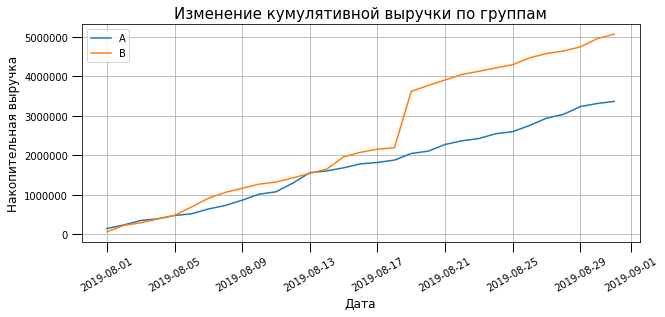

In [ ]:
# Форматирование графика
plt.figure(figsize=(10, 4))
plt.title('Изменение кумулятивной выручки по группам', fontsize=15)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Накопительная выручка', fontsize=12)
plt.tick_params(axis = 'both', which = 'major', length = 10, width = 1, labelsize = 10)
plt.xticks(rotation=30)
plt.grid()


# График кумулятивной выручки группы А
plt.plot(orders_a_cummulative['date'], orders_a_cummulative['revenue_cummulative_a'], label='A')

# График кумулятивной выручки группы B
plt.plot(orders_b_cummulative['date'], orders_b_cummulative['revenue_cummulative_b'], label='B')

# Вывод графиков
plt.legend()
plt.show()

**Вывод**
***
В первую неделю теста, группа B была ниже группы A по накопительной выручки.  
Далее, в течении 2 недель,  в обоих группах происходит равномерный рост.  
К концу месяца, в группе B отмечается прогрессивынй рост.  
Напоним, что тест проводится на сырых данных.  Моглли повлиять выбросы или большой рост числа заказов, который например вызван предверием начало учебного года.

<a id='cummulative_revenue_mean'></a>
#### График изменения кумулятивного среднего чека по группам
***

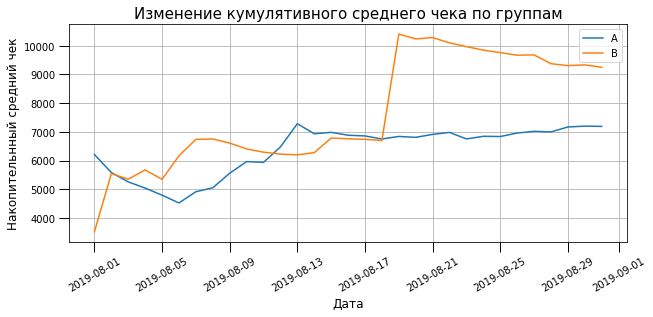

In [ ]:
# Форматирование графика
plt.figure(figsize=(10, 4))
plt.title('Изменение кумулятивного среднего чека по группам', fontsize=15)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Накопительнный средний чек', fontsize=12)
plt.tick_params(axis = 'both', which = 'major', length = 10, width = 1, labelsize = 10)
plt.xticks(rotation=30)
plt.grid()


# График кумулятивного среднего чека группы А
plt.plot(orders_a_cummulative['date'],
         orders_a_cummulative['revenue_cummulative_a'] / orders_a_cummulative['orders_cummulative_a'],
         label='A',
         )

# График кумулятивного среднего чека группы B
plt.plot(orders_b_cummulative['date'],
         orders_b_cummulative['revenue_cummulative_b'] / orders_b_cummulative['orders_cummulative_b'],
         label='B',
         )

# Вывод графиков
plt.legend()
plt.show()

**Вывод**
***
За 2 недели, измение среднего чека по группе B то выше среднего чека группы A, то ниже. Начиная с середины месяца, средний чек группы B сильно растет и значительно превышает показатели группы А. При этом, в группе А показатель не изменяется. Можно предположить, что за этот период сделаны самые дорогие заказы.  
Дальше динамика среднего чека не изменяется, становится ровной в обоих группах, при этом группа B остается лидирующей.

<a id='proportion_cummulative_revenue_mean'></a>
#### График относительного изменения кумулятивного среднего чека
***

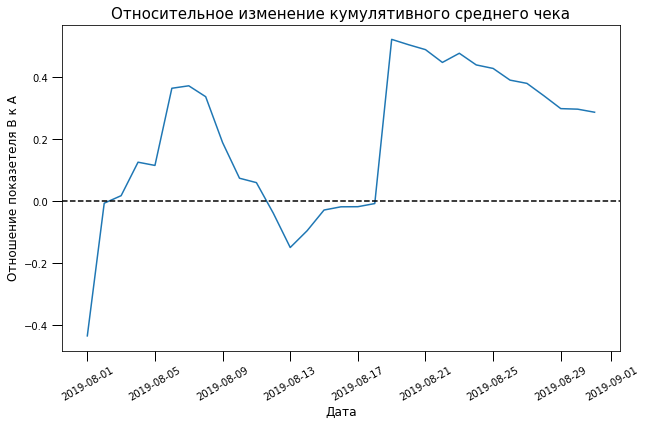

In [ ]:
# Форматирование графика
plt.figure(figsize=(10, 6))
plt.title('Относительное изменение кумулятивного среднего чека', fontsize=15)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Отношение показетеля B к A', fontsize=12)
plt.tick_params(axis = 'both', which = 'major', length = 10, width = 1, labelsize = 10)
plt.xticks(rotation=30)

# График кумулятивного среднего чека группы А
plt.plot(df_general['date'],
         (df_general['revenue_cummulative_b'] / df_general['orders_cummulative_b']) / (df_general['revenue_cummulative_a'] / df_general['orders_cummulative_a']) - 1)

# Добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')


# Вывод графиков
plt.show()


**Вывод**
***
Средний чека группы B по отношению к группе A то растет, то падает.  
Некоторые колебания имеют большую аплитуду.  
Так например за первые 10 пдней периода произошло диаметральное изменение:
- сначало средний чек в группе B был ниже на 40% чем в группе A
- потом изменилось в точности наоборот, средний чек в группе B стал выше на 40% чем в группе A.

Можно сделать вывод о влиянии выбросов в числе заказов или же в их сумме.

<a id='cummulative_conversion'></a>
#### График изменения кумулятивной конверсии по группам
***

Расчитаем конверсию по каждо группе

In [ ]:
# По группе A
df_general['conv_cummulative_a'] = df_general['orders_cummulative_a'] / df_general['visitors_cummulative_a']

# По группе B
df_general['conv_cummulative_b'] = df_general['orders_cummulative_b'] / df_general['visitors_cummulative_b']

Построим график

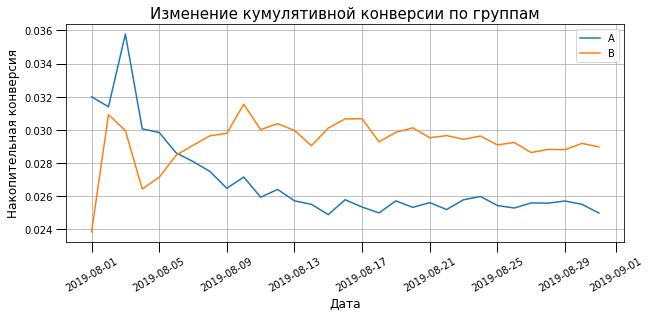

In [ ]:
# Форматирование графика
plt.figure(figsize=(10, 4))
plt.title('Изменение кумулятивной конверсии по группам', fontsize=15)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Накопительная конверсия', fontsize=12)
plt.tick_params(axis = 'both', which = 'major', length = 10, width = 1, labelsize = 10)
plt.xticks(rotation=30)
plt.grid()


# График изменения кумулятивной конверсии по группе A
plt.plot(orders_a_cummulative['date'],
         df_general['conv_cummulative_a'],
         label='A',
         )

# График изменения кумулятивной конверсии по группе B
plt.plot(orders_a_cummulative['date'],
         df_general['conv_cummulative_b'],
         label='B',
         )

# Вывод графиков
plt.legend()
plt.show()

**Вывод**
***
Первую неделю конверсия по группе A была выше, после конверсия по группе B стала выше. Это позволяет нам сделать вывод о том, что гипотеза проверяемая в тестовой группе эввективней в части переходов в заказы.   
На графике виден тренд равномерного снижения по обеим группам:
- по группе B выравнивается около значения 0.030
- по группе A выравнивается около значения 0.026

<a id='proportion_cummulative_conversion'></a>
#### График относительного изменения кумулятивной конверсии по группам
***

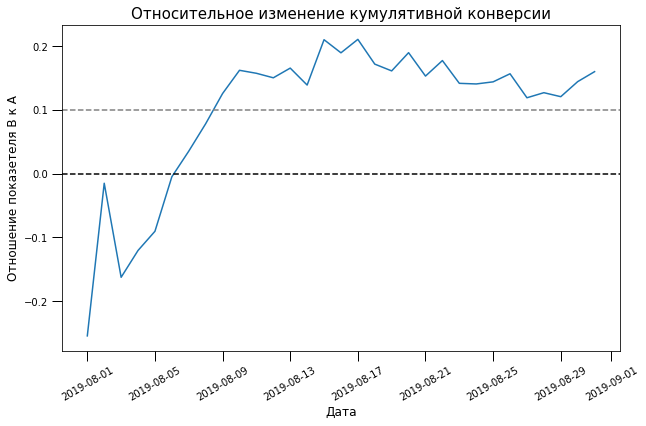

In [ ]:
# Форматирование графика
plt.figure(figsize=(10, 6))
plt.title('Относительное изменение кумулятивной конверсии', fontsize=15)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Отношение показетеля B к A', fontsize=12)
plt.tick_params(axis = 'both', which = 'major', length = 10, width = 1, labelsize = 10)
plt.xticks(rotation=30)

# График кумулятивного среднего чека группы А
plt.plot(df_general['date'],
         (df_general['conv_cummulative_b'] / df_general['conv_cummulative_a']) - 1,
         )

# Добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')

# Вывод графиков
plt.show()

**Вывод**
***
График относительного изменения конверсии подтверждает вывод сделанные на прошлом шаге.  Первую неделю конверсия группы B была ниже A, далее происходит рост: в среднем на 15 % накопительная конверсия группы B выше группы A

<a id='detection_anomaly_in_data'></a>
### Выявление аномалий в данных
***

**to do:**

1. Анализ выбросов в количестве заказов:
    1. Построение точечного графика.
    2. Расчет 95-й и 99-й перцентили количества заказов на пользователя.
    3. Вывод
3. Анализ выбросов в стоимости заказов:
    1. Построение точечного графика.
    2. Расчет 95-й и 99-й перцентили стоимости заказов на пользователя.
    3. Вывод

**Анализ аномалий в количестве заказов на одного пользователя**

Построим точечный график для заказов

In [ ]:
orders_вy_users = df_orders.groupby('visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique})
orders_вy_users.columns = ['visitor_id', 'n_orders']

In [ ]:
orders_вy_users.sort_values(by='n_orders', ascending=False).head(10)

,visitor_id,n_orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


Максимальное количество заказов на одного пользователя 3.  
Первое о  чем мы подумали, это то что такое количество не явлется выбросом.  
Для этого нужно определить типичное значение и уже делать окончательный вывод.  
Построим точечный график.

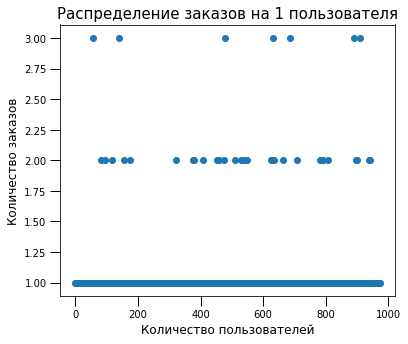

In [ ]:
# Форматирование графика
plt.figure(figsize=(6, 5))
plt.title('Распределение заказов на 1 пользователя', fontsize=15)
plt.xlabel('Количество пользователей', fontsize=12)
plt.ylabel('Количество заказов', fontsize=12)
plt.tick_params(axis = 'both', which = 'major', length = 10, width = 1, labelsize = 10)


# Вывод значений
x_values = pd.Series(range(0,len(orders_вy_users)))
plt.scatter(x_values, orders_вy_users['n_orders'])
plt.show()

Болшинство пользователей с 1 заказом - это типичное значение.  
Также значительное количество пользователей с 2 заказами.
Пользователей с 3 заказами совсем мало.  
Чтобы точно определить какое количество пользователей делали 1 и более заказов, обратимся к перцентилям

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [ ]:
print(np.percentile(orders_вy_users['n_orders'], [95, 99])) 

[1. 2.]


**Вывод**
***
Всего 1 % пользователей делали больше 2 заказов.  
Итого, 2 заказа будет наша граница для фильтрации аномальных данных

**Анализ аномалий в сумме заказов**

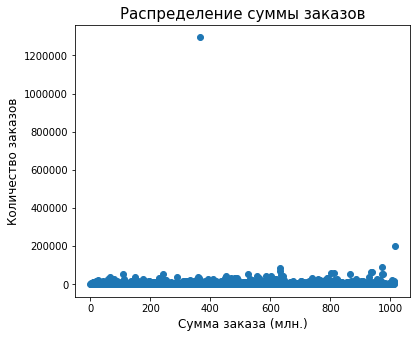

In [ ]:
# Форматирование графика
plt.figure(figsize=(6, 5))
plt.title('Распределение суммы заказов', fontsize=15)
plt.xlabel('Сумма заказа (млн.)', fontsize=12)
plt.ylabel('Количество заказов', fontsize=12)


# Вывод значений
x_values = pd.Series(range(0,len(df_orders['revenue'])))
plt.scatter(x_values, df_orders['revenue'])
plt.show()

Практически все значения находятся до 100000.  
Есть несколько выбросов в 200000 и 1200000, которые явно будут искажать результаты A/B теста.  
Типичное значение определить не удается, т.к. график не информативный - все значения до 100000 слились в одну линию.  
Ограничним отображение значения от 0 до 100000

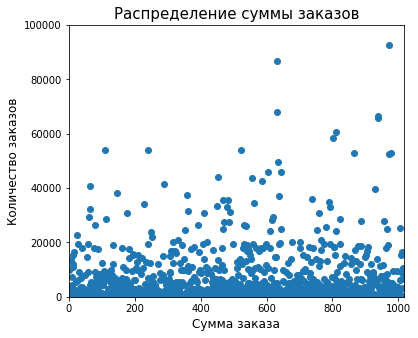

In [ ]:
# Форматирование графика
plt.figure(figsize=(6, 5))
plt.title('Распределение суммы заказов', fontsize=15)
plt.xlabel('Сумма заказа', fontsize=12)
plt.ylabel('Количество заказов', fontsize=12)

# Вывод значений
x_values = pd.Series(range(0,len(df_orders['revenue'])))
plt.scatter(x_values, df_orders['revenue'])
# Ограничение по оси X и Y
plt.axis([0, len(df_orders['revenue']), 0 ,100000]) 
plt.show()

Отлично!  
Мы видим, что большая часть значений размещается до 20000.   
Все остальное является аномалиями, которые влияют на A/B тест.  
Определим перцентили, чтобы точно понять границу.

Проверим перцентили по выручки.

In [ ]:
print(np.percentile(df_orders['revenue'], [95, 99])) 

[26785. 53904.]


**Вывод**
***
Не более 5% заказов дороже 27000 и не более 1% дороже 54000.  
Раброс значений слишком велик, поэтому за границу аномальных даннхы будем брать значение 27000.

<a id='p_value_data'></a>
### Расчет статистической значимости различий в группах на сырых данных
***

**to do:**

1. Посчитать количество заказов на 1 пользователя по каждой группе
2. Сформировать единый `Series` по каждой группе пользователей, который сделали хотя бы 1 заказ и пользователей, которые ни чего не заказывали
3. Расчет статистической значимости различий конверсии в группах
4. Расчет статистической значимости различий среднего чека в группах


Посчитаем число совершенных заказов для каждого пользователя

In [ ]:
# По группе А
orders_вy_users_a = (
    df_orders[df_orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_вy_users_a.columns = ['visitor_id', 'n_orders']

# По группе B
orders_вy_users_b = (
    df_orders[df_orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_вy_users_b.columns = ['visitor_id', 'n_orders'] 

По каждой группе создадим объект `Series`, в котором будут пользователи, которые сделали хотя бы 1 заказы и пользователи без заказов.  
Логика формирования:
***
1. Определяем количесвто пользователей без заказов - это разница общего количества визитов с количество заказов. Это количество мы формируем в объекте `Series`, с указанием индекса на каждый ноль.
2. Производим объедиение в один массив с пользователями, у которых есть хотя-юы один заказ. Объедиение делеам по строкам.
3. Выполняем действие по каждой группе.

In [ ]:
# Количество заказов по пользователям в группе A
sample_a = pd.concat([orders_вy_users_a['n_orders'],
                      pd.Series(0,
                                index=np.arange(df_general['visitors_per_date_a'].sum() - len(orders_вy_users_a['n_orders'])),
                                name='orders')],
                     axis=0)

# Количество заказов по пользователям в группе B
sample_b = pd.concat([orders_вy_users_b['n_orders'],
                      pd.Series(0,
                                index=np.arange(df_general['visitors_per_date_b'].sum() - len(orders_вy_users_b['n_orders'])),
                                name='orders')],
                     axis=0)

**Расчет статистической значимости различий конверсии в группах**  
Гипотеза (двусторонняя):
***
**H0:** Конверсии в группах A и B не различаются  
**H1:** Конверсии в группах A и B различаются

In [ ]:
print("P-уровень значимости различий конверсий в группах: {0:.3f}".format(stats.mannwhitneyu(sample_a, sample_b, alternative = 'two-sided')[1]))
print("Оносительный прирост конверсии группы B: {0:.3f}".format(sample_b.mean() / sample_a.mean() - 1))

P-уровень значимости различий конверсий в группах: 0.011
Оносительный прирост конверсии группы B: 0.160


**Вывод**
***
Конверсия в группа B выше чем в группе А на 16%.  
P-value = 0.01, что меньше чем пороговое значение = 0.05.  
Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии отвергаем.

**Расчет статистической значимости различий среднего чека в группах**  
Гипотеза (двусторонняя):
***
**H0:** Средний чек в группах A и B не различаются  
**H1:** Средний чекв группах A и B различаются

<div style="border:solid green 2px; padding: 20px"> <b>Отличная работа</b><br>
Гипотезы сформулированы верно ✅</div> <br>

In [ ]:
print('P-уровень значимости различий среднего чека в группах: {0:.3f}'.format(stats.mannwhitneyu(df_orders[df_orders['group']=='A']['revenue'], 
                                                                                                 df_orders[df_orders['group']=='B']['revenue'],
                                                                                                 alternative = 'two-sided')[1]))
print('Относительный прирост среднего чека группы B: {0:.3f}'.format(df_orders[df_orders['group']=='B']['revenue'].mean()/df_orders[df_orders['group']=='A']['revenue'].mean()-1))

P-уровень значимости различий среднего чека в группах: 0.829
Относительный прирост среднего чека группы B: 0.287


**Вывод**
***
Средний чек в группе B выше чем в группе А на 28,7 %.  
При этом P-value = 0,829 больше чем пороговое значение = 0.05.  
Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии отвергать мы не можем.  
Различия по результатам теста с вероятностью 8.3% получены случайно, при условии, что нулевая гипотеза верна.

Произведем расчеты по очищенным данным

<a id='p_value_filtered_data'></a>
### Расчет статистической значимости различий в группах на очищенных данных
***

**to do:**

1. Соаздание  `Series`, в коотором сохраниться id пользователей с аномалиями
2. Определение количества заказов на 1 пользователя по каждой группе
3. Сформировать единый `Series` по каждой группе пользователей, который сделали хотя бы 1 заказ и пользователей, которые ни чего не заказывали
4. Расчет статистической значимости различий конверсии в группах
5. Расчет статистической значимости различий среднего чека в группах

Напомним наши границы для среза:  
- Количество заказов >= 2 - 1 % всех пользователей
- Сумма заказов >= 27000 - 5% всех пользователей

In [ ]:
# Срез по количеству заказов
users_with_many_orders = pd.concat(
    [
        orders_вy_users_a[orders_вy_users_a['n_orders'] >= 2]['visitor_id'],
        orders_вy_users_b[orders_вy_users_b['n_orders'] >= 2]['visitor_id'],
    ],
    axis=0,
)
# Срез по сумме заказов
users_with_expensive_orders =  df_orders[df_orders['revenue'] > 27000]['visitor_id']


Объединим данные в один объект `Series`.  
Удалим дубликаты - это будут пользователи, которые проходят по 2 условиям. Для нас главное id этого пользователя.

In [ ]:
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [ ]:
print('Количество пользователей с аномальными данными: {}'.format(abnormal_users.count()))

Количество пользователей с аномальными данными: 86


In [ ]:
# Количество заказов по пользователям в группе A
filtered_sample_a = pd.concat([orders_вy_users_a[np.logical_not(orders_вy_users_a['visitor_id'].isin(abnormal_users))]['n_orders'],
                               pd.Series(0, index=np.arange(df_general['visitors_per_date_a'].sum() - len(orders_вy_users_a['n_orders'])), name='orders')],axis=0)

# Количество заказов по пользователям в группе B
filtered_sample_b = pd.concat([orders_вy_users_b[np.logical_not(orders_вy_users_b['visitor_id'].isin(abnormal_users))]['n_orders'],
                               pd.Series(0, index=np.arange(df_general['visitors_per_date_b'].sum() - len(orders_вy_users_b['n_orders'])), name='orders')],axis=0)

**Расчет статистической значимости различий конверсии в группах**  
Гипотеза (двусторонняя):
***
**H0:** Конверсии в группах A и B не различаются  
**H1:** Конверсии в группах A и B различаются

In [ ]:
print("P-уровень значимости различий конверсий в группах: {0:.3f}".format(stats.mannwhitneyu(filtered_sample_a,
                                                                                             filtered_sample_b,
                                                                                             alternative = 'two-sided')[1]))
print("Оносительный прирост конверсии группы B: {0:.3f}".format(filtered_sample_b.mean() / filtered_sample_a.mean() - 1))

P-уровень значимости различий конверсий в группах: 0.016
Оносительный прирост конверсии группы B: 0.174


**Вывод**
***
P-value ниже порогового значения = 0.05.  
Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии отвергаем. Результат теста в сравнении с тестом на сырых данных не изменеился, но изменилось отношенией конверсий, она увеличилась с 16% до 17.4%.

**Расчет статистической значимости различий среднего чека в группах**  
Гипотеза (двусторонняя):
***
**H0:** Средний чек в группах A и B не различаются  
**H1:** Средний чекв группах A и B различаются

In [ ]:
print('P-уровень значимости различий среднего чека в группах: {0:.3f}'.format(stats.mannwhitneyu(df_orders[np.logical_and(df_orders['group']=='A',
                                                                                                                          np.logical_not(df_orders['visitor_id'].isin(abnormal_users)))]['revenue'], 
                                                                                                 df_orders[np.logical_and(df_orders['group']=='B',
                                                                                                                          np.logical_not(df_orders['visitor_id'].isin(abnormal_users)))]['revenue'],
                                                                                                 alternative = 'two-sided')[1]))
print('Относительный прирост среднего чека группы B: {0:.3f}'.format(df_orders[np.logical_and(df_orders['group']=='B', np.logical_not(df_orders['visitor_id'].isin(abnormal_users)))]['revenue'].mean()/df_orders[np.logical_and(df_orders['group']=='A',np.logical_not(df_orders['visitor_id'].isin(abnormal_users)))]['revenue'].mean()-1))

P-уровень значимости различий среднего чека в группах: 0.727
Относительный прирост среднего чека группы B: -0.034


**Вывод**
***
Резуьтат теста различий среднего чека также не изменился- мы не можем отвргнуть нулевую гипотезу о статистически значимых различий в группе. Но произошли координальные изменения в относительных результатах сравнения среднего чека.  
На сырых данных средний чек в группе B был выше среднего чека в группе А на 28.7%. На очищенных данных он ниже на 3%.  
Какой из этого можно сделать вывод ?

В обеих группах были выбросы, которые искажали результат.  Причем в группе B значения этих выбросов выше чем в группе  
Эти различия не были статистически значимы.   
После очистки от выбросов мы по прежнему получаем то, что наши различия статистически не отличаются, но уже такой разницы в значения мы не наблюдаем, отноешние приблизилось к нулю.

<a id='fin'></a>
## Общий вывод
***

На основе проведенного анализа результатов A/B теста мы можем сделать вывод об **...** внедряемой гипотезы, конкретнно:
- Мы получили статистически значимые различия конверсий в группе A и B, при этом конверсия группы B выше чем конверсия группы А на 17.4%. То есть гипотеза увеличила конверсию из визитов в заказы - это отличный показатель, так как наша выручка складывается и среднего чека, умноженного на  количества покупаталей. Раз покупатаелей стало больше, значит выручка также увеличиться. 
***
Таким образом необходимо остановить тест и признать, что выручка в группе B выше, а значит тестируемая гипотеза эффективная. Необходимо внедрение.
